# K Means Clustering Project

## Problem Statement and Context

In our retail estate we have a large number of food products which reach their expiry date within our stores. The current process is to scan these products prior to store opening, and reducing them by placing a yellow sticker on them with a lower price.

There is currently some logic in place called 'Ones and Twos' - this logic is present in the application where the colleague scans the product to reduce it, and will recommend that the colleague doesn't reduce a product where the quantity is one or two. The colleague then returns later in the day to mark whether the products subsequently sold at full price, or whether it needs to be reduced.

Using 3 months of data on whether certain products sold after being added to this list, I want to see if we can make a better recommendation on whether the product should be added to the list or not by clustering different food products.

## Hypothesis

My hypothesis is that there is a correlation between the volume sold and the volume unsold, which can help cluster the data, and give us a recommendation as to whether or not we should reduce a product pre-opening, or whether we should leave it to try and sell it at full price.

### Step 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

### Step 2. Load data


In [3]:
contents = pd.read_csv('foodsdata6jan23mar.csv')
contents.head

<bound method NDFrame.head of          upc             name  total_volume_sold  total_value_sold  \
0       2929     FLAT PARSLEY               91.0             72.80   
1       3063  CHICKEN KIEV X2              663.0           2321.10   
2       3506  DUCK A L'ORANGE               63.0            535.50   
3       9515  DINE IN CHICKEN                2.0             12.00   
4      10191    SAL PRAWN AVO                6.0             36.00   
5      10238   PRWN SAL TERIN                0.0              0.00   
6      11235    S/CRST PASTRY               59.0            118.00   
7      11297        MANDAGOLD               23.0             50.00   
8      11600   F/R EGG LGE X6              388.0            776.80   
9      11709      AB FLJK CKS                3.0              5.25   
10     11716      F/R EGGS X6               63.0             85.25   
11     11778   RF ST GING CKS                2.0              3.50   
12     11839   STWBRY & BANAN               34.0            

The data has been successfully imported. The first column represents the UPC of the food product, the next column represents the name of the product. The next column how many times the product sold at full price when not reduced in the morningby volume, and the next column is by value. The final two columns represents how many time each product didn't sell at full price, and subsequently was reduced to a lower price in the afternoon by volume and by value.

For the purpose of this exercise I will only use volume.

### Step 3. Transform the data for python

In [4]:
contents.columns = ['UPC', 'name', 'volumesold', 'valuesold', 'volumeunsold', 'valueunsold']
print(contents[['name']])
contents.head

                 name
0        FLAT PARSLEY
1     CHICKEN KIEV X2
2     DUCK A L'ORANGE
3     DINE IN CHICKEN
4       SAL PRAWN AVO
5      PRWN SAL TERIN
6       S/CRST PASTRY
7           MANDAGOLD
8      F/R EGG LGE X6
9         AB FLJK CKS
10        F/R EGGS X6
11     RF ST GING CKS
12     STWBRY & BANAN
13    R/BOW BABY CARR
14       KIDDERTON CW
15     P/PASSIONFRUIT
16     SLICED WH MRMS
17     BIRCHER MUESLI
18       ROTIS CHICKN
19    BCON&CHS BAKE (
20       COU CHKN PIE
21      COU BEEF RAGU
22    COU PRWN LINGNE
23     COU CHK ARRBTA
24    BFY POT RST CHK
25     BFY BEEF NDLES
26     WHOLE BIRD LGE
27    P/S/O CHICKN FW
28    CGRILL PRNS 80G
29    CHILLI CON CRNE
...               ...
3165  KATSU CHK CURRY
3166    SIMPLY ORANGE
3167  ODB GREAT BRITI
3168  2 SIRLOIN STEAK
3169  6 PORK/CAR SAUS
3170    TOPSIDE STEAK
3171  BANOFFEE C/CAKE
3172  0% FAT APL/PLUM
3173   0% FAT APRICOT
3174   0% FAT R/BERRY
3175   0% FAT S/BERRY
3176   YORKSHIRE BLUE
3177    APPLE CRUMBLE
3178  ROSE

<bound method NDFrame.head of          UPC             name  volumesold  valuesold  volumeunsold  \
0       2929     FLAT PARSLEY        91.0      72.80         171.0   
1       3063  CHICKEN KIEV X2       663.0    2321.10         913.0   
2       3506  DUCK A L'ORANGE        63.0     535.50         125.0   
3       9515  DINE IN CHICKEN         2.0      12.00           0.0   
4      10191    SAL PRAWN AVO         6.0      36.00           7.0   
5      10238   PRWN SAL TERIN         0.0       0.00           0.0   
6      11235    S/CRST PASTRY        59.0     118.00         156.0   
7      11297        MANDAGOLD        23.0      50.00          14.0   
8      11600   F/R EGG LGE X6       388.0     776.80         230.0   
9      11709      AB FLJK CKS         3.0       5.25           0.0   
10     11716      F/R EGGS X6        63.0      85.25          58.0   
11     11778   RF ST GING CKS         2.0       3.50           0.0   
12     11839   STWBRY & BANAN        34.0      78.30        

The data was already in a clean state, with floats present for number of times which the items were sold or unsold. I have renamed the columns  to make it easier in the python script. But worth highlighting that from now on all values are volume as opposed to £sales value.

### Step 4. Visualise the data

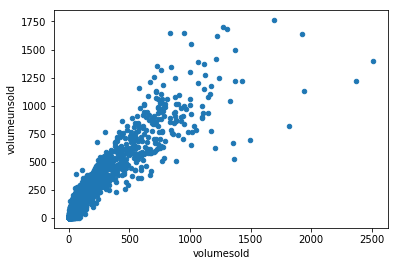

In [5]:
contents.plot.scatter(x ='volumesold', y ='volumeunsold')

At first glance, there is no way of humanly determining any clusters. There are a couple of outliers, but no conclusions can be drawn from looking at the data in this context.

### Step 5. Applying K Means Clustering

In [10]:
data = []
for index, row in contents.iterrows():
    sold = row['volumesold']
    unsold = row['volumeunsold']
    data.append( [float(sold), float(unsold)] )
    
model = KMeans(n_clusters=5)
model.fit(scale(data))

contents['cluster'] = model.labels_.astype(float)

### Step 6. Visualise the Clusters

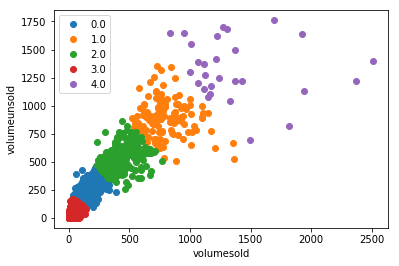

In [11]:
groups = contents.groupby('cluster')

# Plot the clusters
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.volumesold,group.volumeunsold, marker='o', linestyle='', label=name)
    
plt.xlabel('volumesold')
plt.ylabel('volumeunsold')
ax.legend()

### Step 7. Use Elbow test to decide number of clusters

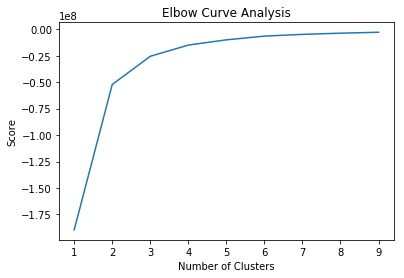

In [12]:
x = contents[['volumesold']]
y = contents[['volumeunsold']]

num_clusters = [1,2,3,4,5,6,7,8,9]
kmeans = [ KMeans(n_clusters=i) for i in num_clusters ]
score = [ kmeans[i-1].fit(y).score(y)for i in num_clusters ]

plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve Analysis')
plt.show()

The elbow analysis is recommending that after 4 there isn't much more to be gained from an increased number of clusters.

At this stage I don't believe the clustering is giving much of a conclusion. This is because the volume sold and unsold together always add up to 100% of the transactions, and therefore we are getting a very linear pattern.

I believe it may be worth looking at whether the price also impacts the chance of an item selling.
In order to do this I will need some additional data.


## Step 8. Changing the data used to cluster

In [8]:
print(contents)

         UPC             name  volumesold  valuesold  volumeunsold  \
0       2929     FLAT PARSLEY        91.0      72.80         171.0   
1       3063  CHICKEN KIEV X2       663.0    2321.10         913.0   
2       3506  DUCK A L'ORANGE        63.0     535.50         125.0   
3       9515  DINE IN CHICKEN         2.0      12.00           0.0   
4      10191    SAL PRAWN AVO         6.0      36.00           7.0   
5      10238   PRWN SAL TERIN         0.0       0.00           0.0   
6      11235    S/CRST PASTRY        59.0     118.00         156.0   
7      11297        MANDAGOLD        23.0      50.00          14.0   
8      11600   F/R EGG LGE X6       388.0     776.80         230.0   
9      11709      AB FLJK CKS         3.0       5.25           0.0   
10     11716      F/R EGGS X6        63.0      85.25          58.0   
11     11778   RF ST GING CKS         2.0       3.50           0.0   
12     11839   STWBRY & BANAN        34.0      78.30          86.0   
13     11891  R/BOW 

In [9]:
# Here I am adding a new column. I don't have the individual price information for a product, but I can calculate it by dividing the value of the products sold with the volume of the products sold. 
contents['Price'] = contents['valuesold']/contents['volumesold']

In [10]:
print(contents)

         UPC             name  volumesold  valuesold  volumeunsold  \
0       2929     FLAT PARSLEY        91.0      72.80         171.0   
1       3063  CHICKEN KIEV X2       663.0    2321.10         913.0   
2       3506  DUCK A L'ORANGE        63.0     535.50         125.0   
3       9515  DINE IN CHICKEN         2.0      12.00           0.0   
4      10191    SAL PRAWN AVO         6.0      36.00           7.0   
5      10238   PRWN SAL TERIN         0.0       0.00           0.0   
6      11235    S/CRST PASTRY        59.0     118.00         156.0   
7      11297        MANDAGOLD        23.0      50.00          14.0   
8      11600   F/R EGG LGE X6       388.0     776.80         230.0   
9      11709      AB FLJK CKS         3.0       5.25           0.0   
10     11716      F/R EGGS X6        63.0      85.25          58.0   
11     11778   RF ST GING CKS         2.0       3.50           0.0   
12     11839   STWBRY & BANAN        34.0      78.30          86.0   
13     11891  R/BOW 

A couple of things I have noticed here - I have some lines with 'NaN' - these lines seem to have low total volumes so I will remove them. 
I also see that there is a column with the cluster previously derived. I will try to remove this column - otherwise I will start a new python notebook and import the data again.

In [11]:
#first I delete the cluster
del contents['cluster']
print(contents)


         UPC             name  volumesold  valuesold  volumeunsold  \
0       2929     FLAT PARSLEY        91.0      72.80         171.0   
1       3063  CHICKEN KIEV X2       663.0    2321.10         913.0   
2       3506  DUCK A L'ORANGE        63.0     535.50         125.0   
3       9515  DINE IN CHICKEN         2.0      12.00           0.0   
4      10191    SAL PRAWN AVO         6.0      36.00           7.0   
5      10238   PRWN SAL TERIN         0.0       0.00           0.0   
6      11235    S/CRST PASTRY        59.0     118.00         156.0   
7      11297        MANDAGOLD        23.0      50.00          14.0   
8      11600   F/R EGG LGE X6       388.0     776.80         230.0   
9      11709      AB FLJK CKS         3.0       5.25           0.0   
10     11716      F/R EGGS X6        63.0      85.25          58.0   
11     11778   RF ST GING CKS         2.0       3.50           0.0   
12     11839   STWBRY & BANAN        34.0      78.30          86.0   
13     11891  R/BOW 

In [12]:
#Here I drop the rows where at least one element is missing.
contents.dropna()

,UPC,name,volumesold,valuesold,volumeunsold,valueunsold,Price
0,2929,FLAT PARSLEY,91.0,72.80,171.0,136.88,0.800000
1,3063,CHICKEN KIEV X2,663.0,2321.10,913.0,3196.10,3.500905
2,3506,DUCK A L'ORANGE,63.0,535.50,125.0,1062.50,8.500000
3,9515,DINE IN CHICKEN,2.0,12.00,0.0,0.00,6.000000
4,10191,SAL PRAWN AVO,6.0,36.00,7.0,42.00,6.000000
6,11235,S/CRST PASTRY,59.0,118.00,156.0,312.20,2.000000
7,11297,MANDAGOLD,23.0,50.00,14.0,32.00,2.173913
8,11600,F/R EGG LGE X6,388.0,776.80,230.0,460.70,2.002062
9,11709,AB FLJK CKS,3.0,5.25,0.0,0.00,1.750000
10,11716,F/R EGGS X6,63.0,85.25,58.0,78.40,1.353175


I have dropped 294 rows which had an element missing.

In [13]:
#Here I have rounded the price to two decimal places.
contents.Price = contents.Price.round(2)

In [19]:
contents.dtypes

UPC               int64
name             object
volumesold      float64
valuesold       float64
volumeunsold    float64
valueunsold     float64
Price           float64
dtype: object

I am now in a position to retry the clustering, and see if there is some correlation that can be found between the price and the chance of selling.

### Step 9. Visualise the NEW data

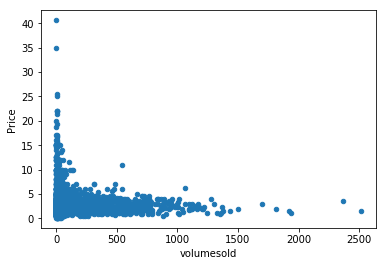

In [26]:
contents.plot.scatter(x ='volumesold', y ='Price')

### Step 10. Applying K Means Clustering on the NEW data

In [39]:
data = []
for index, row in contents.iterrows():
    volumesold = row['volumesold']
    valuesold = row['valuesold']
    data.append( [float(volumesold), float(Price)] )

model = KMeans(n_clusters=4)
model.fit(scale(data))

contents['cluster'] = model.labels_.astype(float)

### Step 11. Visualise the Clusters

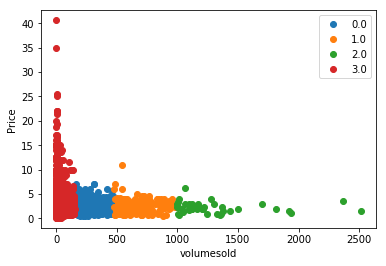

In [40]:
groups = contents.groupby('cluster')

# Plot the clusters
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.volumesold,group.Price, marker='o', linestyle='', label=name)
    
plt.xlabel('volumesold')
plt.ylabel('Price')
ax.legend()

In the visualisation above there are some clear clusters -
Cluster 3 shows products which don't tend to sell at full price, and Cluster 2 shows products which have a high volume of sold, and are often at a low price.

Given that we want to be able to use this data to inform the decision of whether a product should be reduced at the shelf edge or not in the morning based on its cluster, I will reapply the visualisation with only two clusters.

In [41]:
data = []
for index, row in contents.iterrows():
    volumesold = row['volumesold']
    valuesold = row['valuesold']
    data.append( [float(volumesold), float(Price)] )

model = KMeans(n_clusters=2)
model.fit(scale(data))

contents['cluster'] = model.labels_.astype(float)

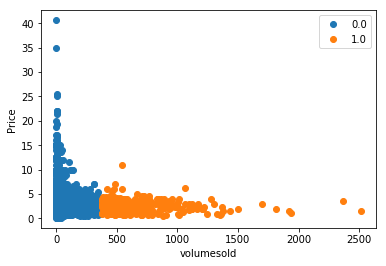

In [42]:
groups = contents.groupby('cluster')

# Plot the clusters
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.volumesold,group.Price, marker='o', linestyle='', label=name)
    
plt.xlabel('volumesold')
plt.ylabel('Price')
ax.legend()

Here we now have two clusters. The orange cluster shows products which have a higher likelyhood to sell. There is some correlation between price and volume sold. I would conclude that the lower the price, the more likely the product is to sell on its final day of expiry, however I don't believe the evidence here would give me a cluster that could be used as the logic to make a recommendation.